In [1]:
#Importing the basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading the dataset
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
Y=df['Attrition']

In [6]:
#Coverting the y of the dataset to 1s and 0s
y=pd.get_dummies(Y,drop_first=True)

In [7]:
#dropping the y from dataset
df.drop('Attrition',axis=1,inplace=True)
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [8]:
#Dropping not so useful features and changing categorical features to numbers
Trv=pd.get_dummies(df['BusinessTravel'],drop_first=True)
ot=pd.get_dummies(df['OverTime'],drop_first=True)
ge=pd.get_dummies(df['Gender'],drop_first=True)
ms=pd.get_dummies(df['MaritalStatus'],drop_first=True)
df.drop(['BusinessTravel','EducationField','Department','Education','RelationshipSatisfaction','TrainingTimesLastYear','EmployeeCount','EmployeeNumber','JobRole','OverTime','Over18','Gender','MaritalStatus','StockOptionLevel'],axis=1,inplace=True)

In [9]:
df=pd.concat([df,Trv,ot,ge,ms],axis=1)
df

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Frequently,Travel_Rarely,Yes,Male,Married,Single
0,41,1102,1,2,94,3,2,4,5993,19479,...,6,4,0,5,0,1,1,0,0,1
1,49,279,8,3,61,2,2,2,5130,24907,...,10,7,1,7,1,0,0,1,1,0
2,37,1373,2,4,92,2,1,3,2090,2396,...,0,0,0,0,0,1,1,1,0,1
3,33,1392,3,4,56,3,1,3,2909,23159,...,8,7,3,0,1,0,1,0,1,0
4,27,591,2,1,40,3,1,2,3468,16632,...,2,2,2,2,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,3,41,4,2,4,2571,12290,...,5,2,0,3,1,0,0,1,1,0
1466,39,613,6,4,42,2,3,1,9991,21457,...,7,7,1,7,0,1,0,1,1,0
1467,27,155,4,2,87,4,2,2,6142,5174,...,6,2,0,3,0,1,1,1,1,0
1468,49,1023,2,4,63,2,2,2,5390,13243,...,9,6,0,8,1,0,0,1,1,0


In [10]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.4, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler as SS

In [12]:
#Standardization
ss=SS()
X_tr=ss.fit_transform(X_train)
X_te=ss.transform(X_test)

First Model: Logistic Regression 

In [13]:
from sklearn.linear_model import LogisticRegression as LS

In [14]:
#Creating model1
ls=LS(max_iter=600)

In [15]:
ls.fit(X_tr,y_train.values.ravel())

LogisticRegression(max_iter=600)

In [16]:
y_pred=ls.predict(X_te)

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
confusion_matrix(y_test,y_pred)

array([[490,  17],
       [ 53,  28]], dtype=int64)

In [19]:
from sklearn.metrics import accuracy_score
accu_log=accuracy_score(y_test,y_pred)
accu_log

0.8809523809523809

Accuracy by Logistic Regression nearly 87%
Second Model: Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [21]:
#Creating model2
rfc=RFC()

In [22]:
rfc.fit(X_tr,y_train.values.ravel())

RandomForestClassifier()

In [23]:
y_pred_rfc=rfc.predict(X_te)

In [24]:
confusion_matrix(y_test,y_pred_rfc)

array([[502,   5],
       [ 69,  12]], dtype=int64)

In [25]:
accu_rfc=accuracy_score(y_test,y_pred_rfc)
accu_rfc

0.8741496598639455

Third Model: Artificial Neural Network

In [26]:
import tensorflow as tf

In [27]:
#Creating Model3
model=tf.keras.models.Sequential()

In [28]:
#Input Layer
model.add(tf.keras.layers.Dense(activation=tf.nn.relu,units=26))
#hidden layer 1
model.add(tf.keras.layers.Dense(activation=tf.nn.relu,units=512))
#hidden layer 2
model.add(tf.keras.layers.Dense(activation=tf.nn.relu,units=256))
#Hidden layer 3
model.add(tf.keras.layers.Dense(activation=tf.nn.relu,units=128))
#Hidden layer 4
model.add(tf.keras.layers.Dense(activation=tf.nn.relu,units=128))
#Output layer
model.add(tf.keras.layers.Dense(activation=tf.nn.sigmoid,units=2))

In [29]:
#Configuring the model for training
model.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')

In [30]:
#Applying the model for the training dataset 
model.fit(X_tr,y_train,epochs=30)

Epoch 1/40
28/28 [==============================] - 1s 3ms/step - loss: 0.4819 - accuracy: 0.8073
Epoch 2/40
28/28 [==============================] - 0s 3ms/step - loss: 0.3881 - accuracy: 0.8367
Epoch 3/40
28/28 [==============================] - 0s 3ms/step - loss: 0.3763 - accuracy: 0.8469
Epoch 4/40
28/28 [==============================] - 0s 4ms/step - loss: 0.3354 - accuracy: 0.8605
Epoch 5/40
28/28 [==============================] - 0s 4ms/step - loss: 0.3045 - accuracy: 0.8810
Epoch 6/40
28/28 [==============================] - 0s 4ms/step - loss: 0.2812 - accuracy: 0.8878
Epoch 7/40
28/28 [==============================] - 0s 3ms/step - loss: 0.2521 - accuracy: 0.9036
Epoch 8/40
28/28 [==============================] - 0s 3ms/step - loss: 0.2203 - accuracy: 0.9138
Epoch 9/40
28/28 [==============================] - 0s 3ms/step - loss: 0.1818 - accuracy: 0.9354
Epoch 10/40
28/28 [==============================] - 0s 3ms/step - loss: 0.1393 - accuracy: 0.9512
Epoch 11/40
28/28 [

In [31]:
y_pred_nn=model.predict(X_te)
len(y_pred_nn)

588

In [32]:
y_nn=[0]*588
for i in range(0,588):
    if y_pred_nn[i][0]<=0.5:
        y_nn[i]=1
    else:
        y_nn[i]=0
    

In [33]:
confusion_matrix(y_test,y_nn)

array([[400, 107],
       [ 39,  42]], dtype=int64)

In [34]:
accu_nn=accuracy_score(y_test,y_nn)
accu_nn

0.7517006802721088

Now we find f1-scores of the models

In [35]:
 from sklearn.metrics import f1_score 

In [36]:
f1_lr=f1_score(y_test,y_pred)
f1_rfc=f1_score(y_test,y_pred_rfc)
f1_nn=f1_score(y_test,y_nn)

In [37]:
gr=[[accu_log,accu_rfc,accu_nn],[f1_lr,f1_rfc,f1_nn]]
gr

[[0.8809523809523809, 0.8741496598639455, 0.7517006802721088],
 [0.4444444444444444, 0.24489795918367346, 0.3652173913043478]]

In [38]:
res=pd.DataFrame(gr,columns=['LogisticRegression','RandomForest','NeuralNetwork'])
res

,LogisticRegression,RandomForest,NeuralNetwork
0,0.880952,0.874150,0.751701
1,0.444444,0.244898,0.365217


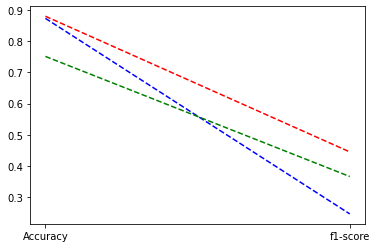

In [39]:
X_gr=['Accuracy','f1-score']
plt.plot(X_gr, res['LogisticRegression'], 'r--', X_gr,res['RandomForest'], 'b--', X_gr,res['NeuralNetwork'], 'g--')

Red:Logistic Regression 

Blue:Random Forest Classifier

Green:Neural Network

By the above graph, we can conclude:
1. Logistic Regression gives the best accuracy and f1-score
2. Random Forest Classifier gives accuracy similar to Logistic Regression but a lower f1-score
3. Neural Network gives a lower accuracy than the first two but similar f1-score to Logistic Regression

Therefore, the best model of is Logistic Regression

We used Logistic Regression as the first model because it is very efficient to train and is very fast at classifying.

We used Random Forest Classifier as second model because it reduces overfitting problem in decision trees and also reduces the variance and therefore improves the accuracy.

We used Artificial Neural Network as the third model because neural network can implement tasks that a linear program cannot and they have the ability to learn by themselves and produce the output that is not limited to the input provided to them.

In [40]:
#Predicting random test data by all three models
print(y_pred[10])
print(y_pred_rfc[10])
print(y_nn[10])
print(y_test.values.ravel()[10])

0
0
0
0


In [41]:
print(y_pred[12])
print(y_pred_rfc[12])
print(y_nn[12])
print(y_test.values.ravel()[12])

0
0
0
0


In [42]:
print(y_pred[18])
print(y_pred_rfc[18])
print(y_nn[18])
print(y_test.values.ravel()[18])

0
0
1
1
